In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Energyefficiency.csv')
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


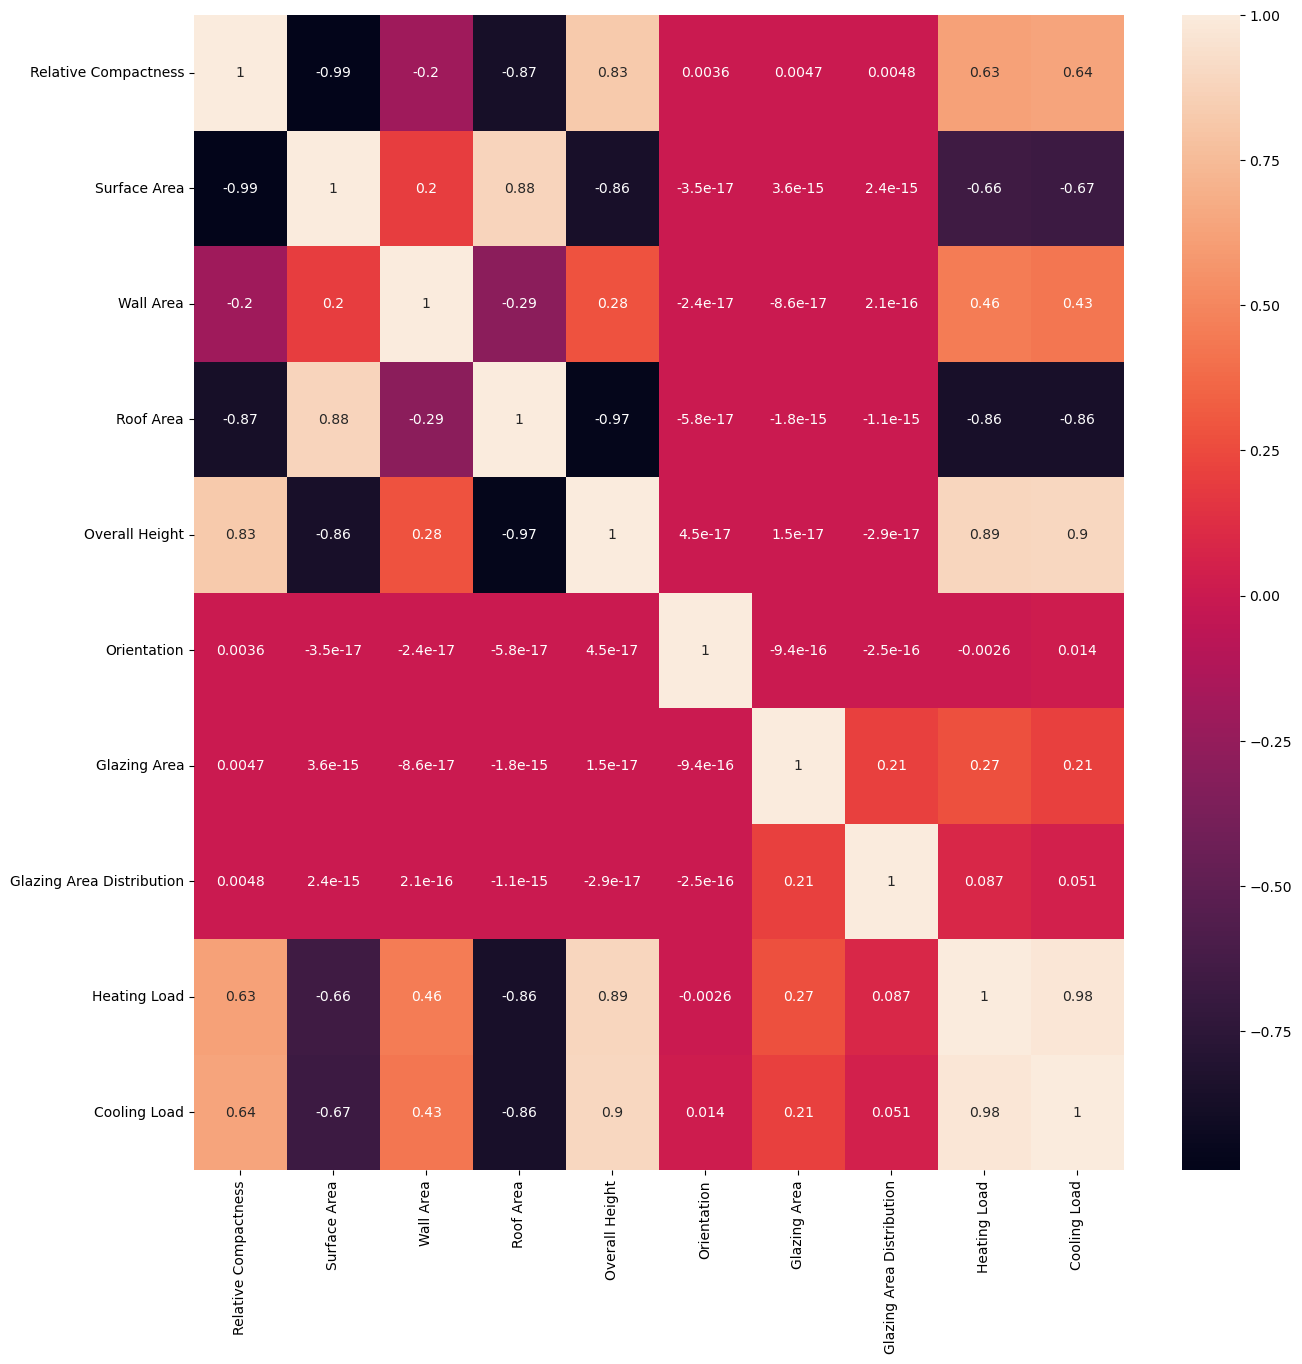

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True);

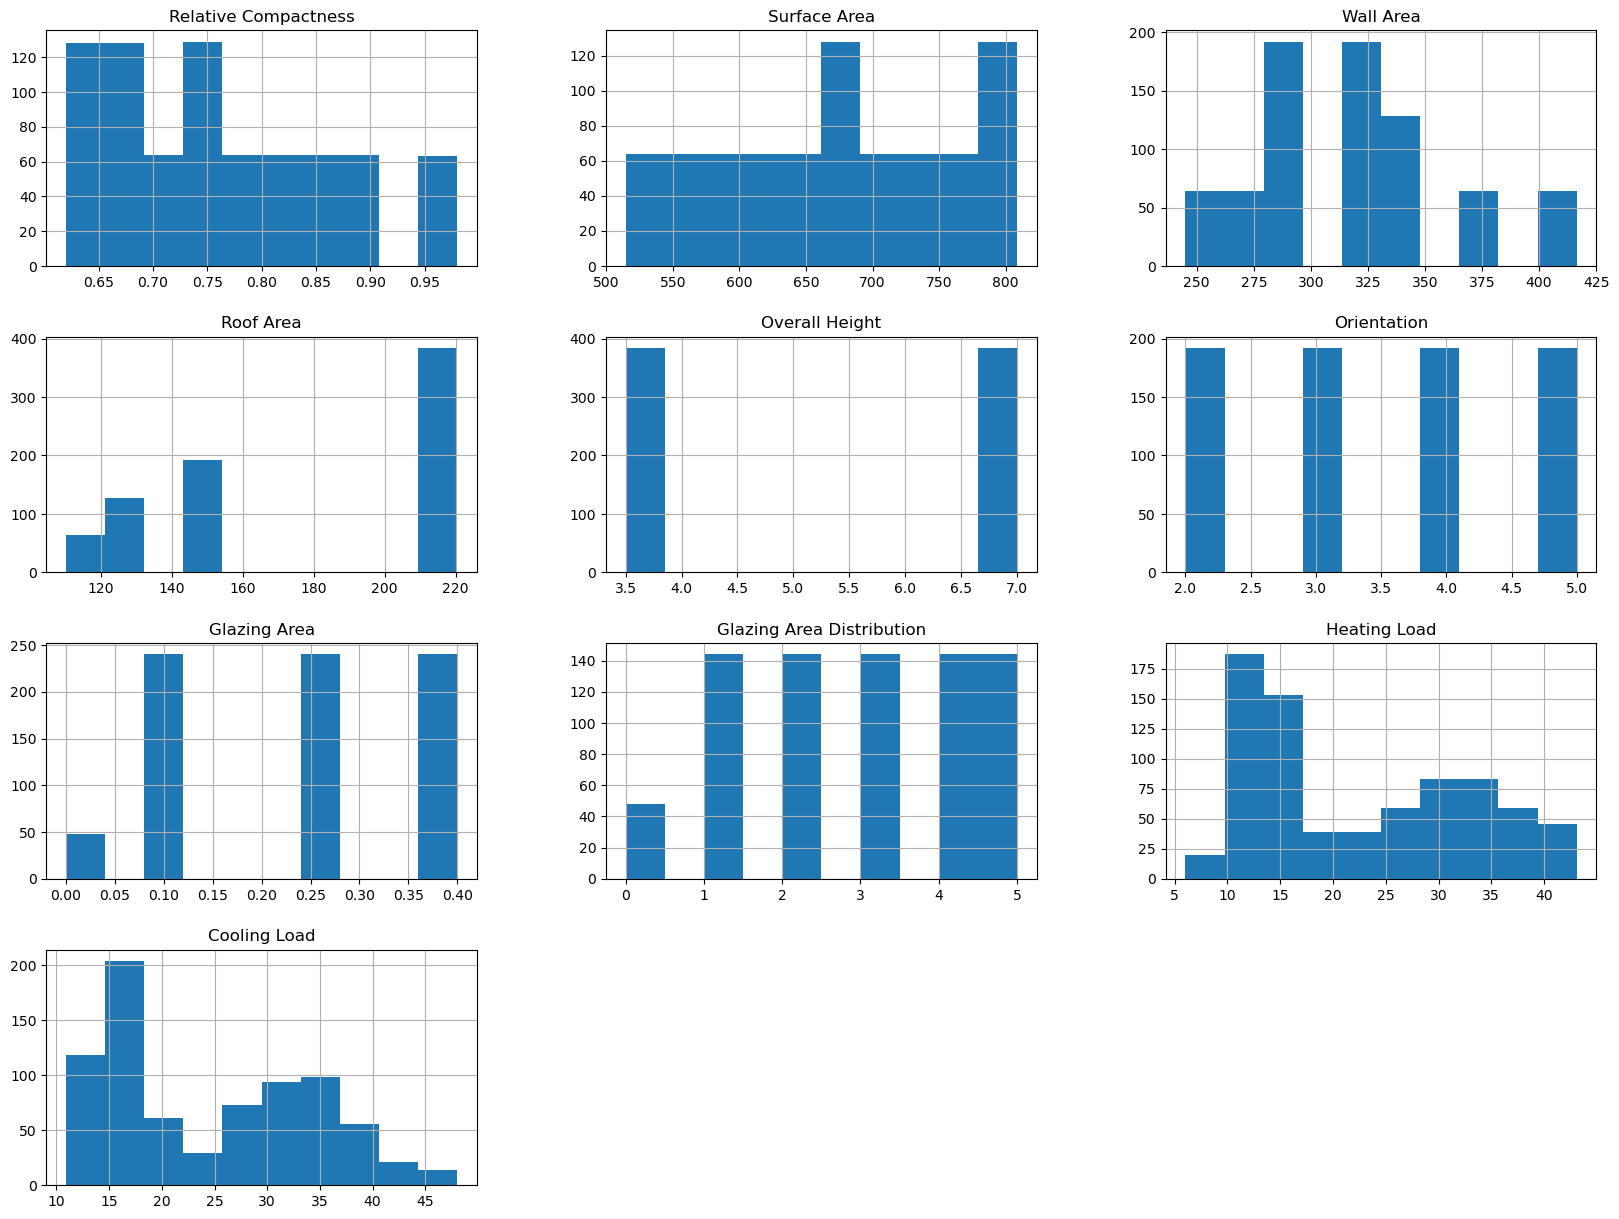

In [5]:
data.hist(bins=10, figsize=(20,15))
plt.show()

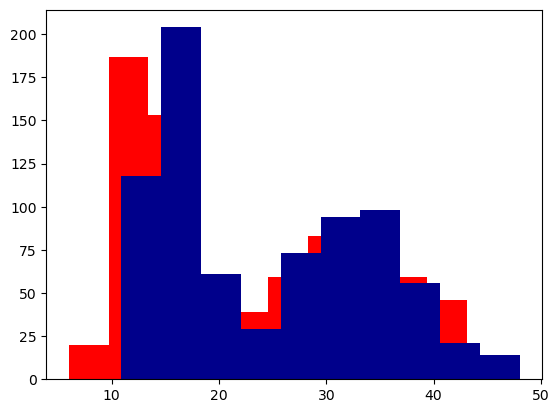

In [6]:
plt.hist(data["Heating Load"],color="red");
plt.hist(data["Cooling Load"],color = "darkblue");

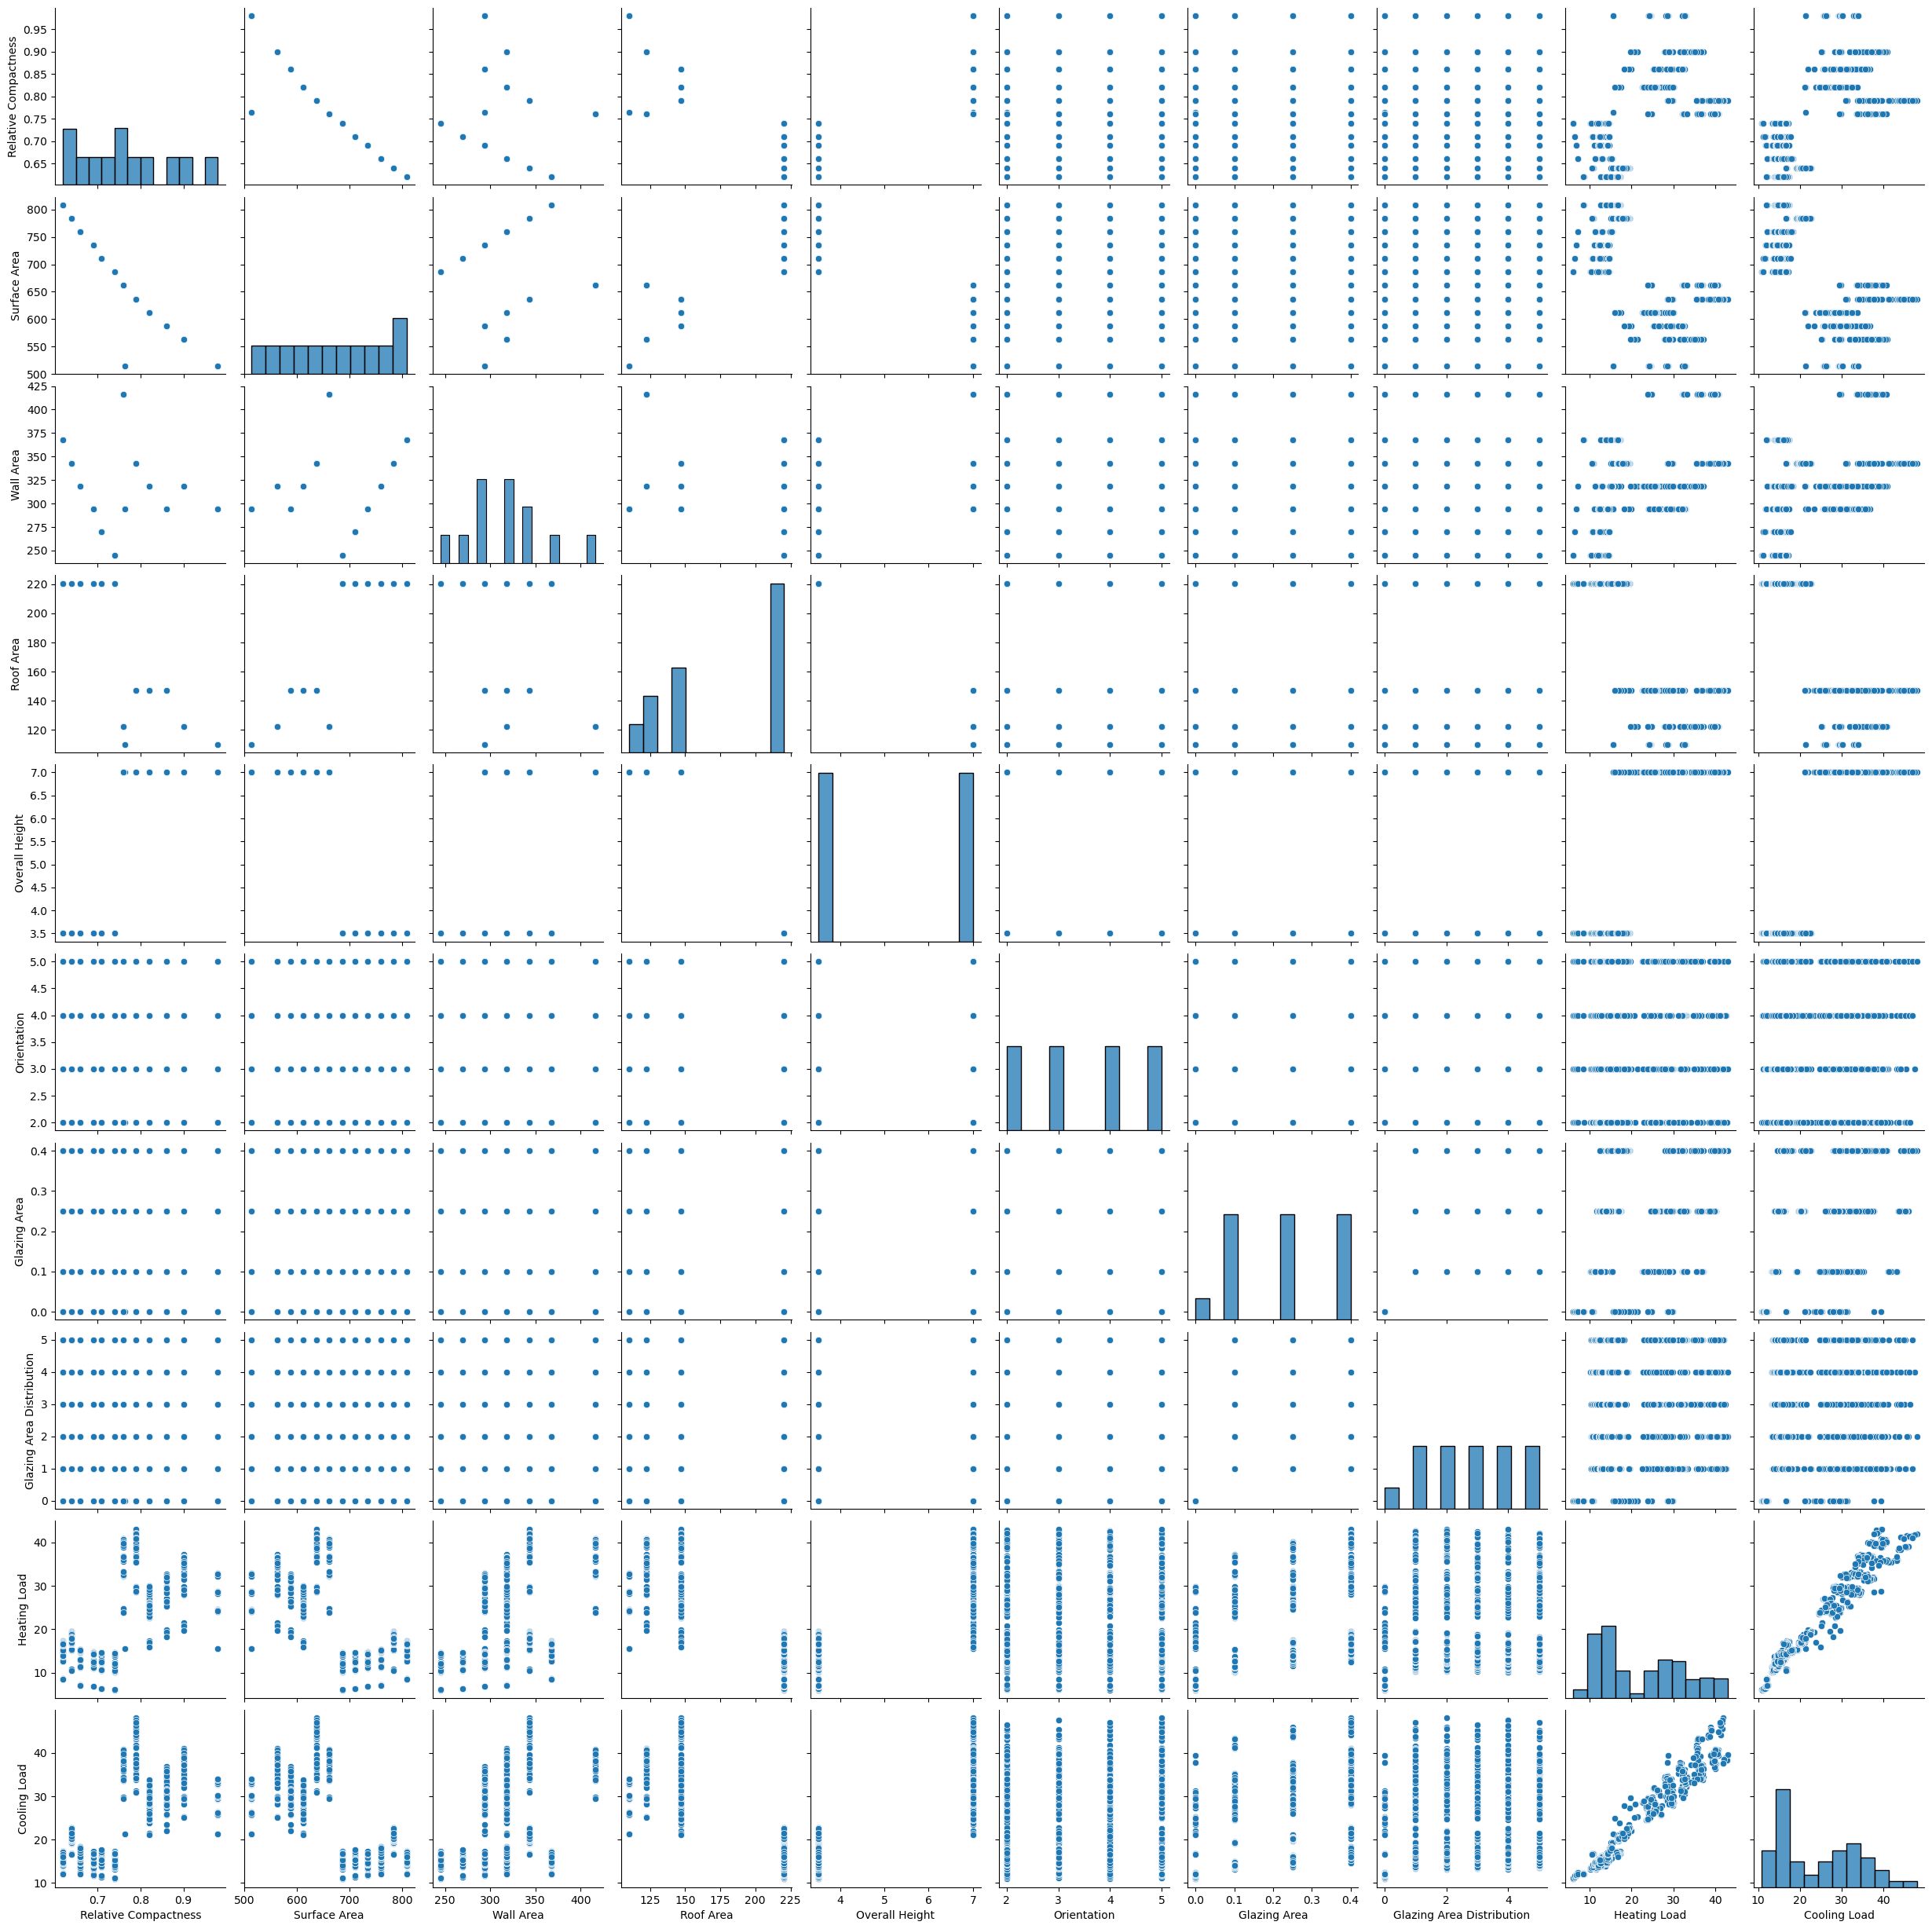

In [7]:
sns.pairplot(data);

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [9]:
X = data.drop(["Heating Load","Cooling Load"],axis =1)
y1 = data["Heating Load"]
y2 = data["Cooling Load"]

In [10]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

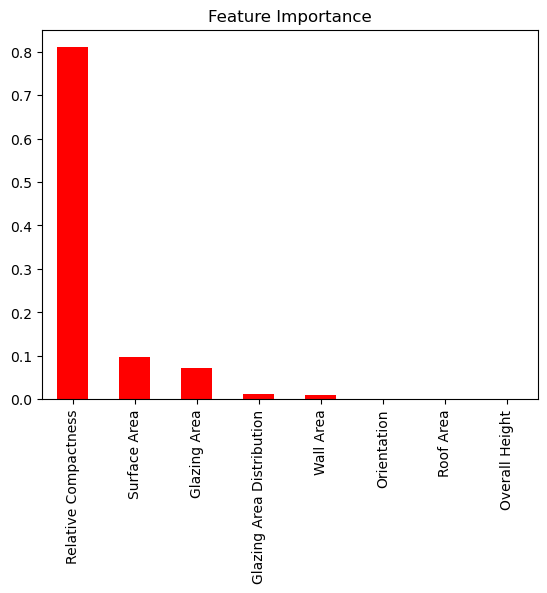

Cross-validation scores: [0.98598889 0.99637405 0.99743442 0.99335069 0.99582482]
Mean R-squared score: 0.9937945734405892
Training Metrics:
MSE: 4.604246528527306e-33
R-squared score: 1.0
Testing Metrics:
MSE: 0.2868614173228348
R-squared score: 0.9972176384525746
                   MSE  R-squared score
Training  4.604247e-33         1.000000
Testing   2.868614e-01         0.997218


In [11]:
dt = DecisionTreeRegressor()


dt.fit(X_train, y1_train)


y1_test_pred = dt.predict(X_test)
mse_test_h1 = mean_squared_error(y1_test, y1_test_pred)
r2_test_h1 = r2_score(y1_test, y1_test_pred)


y1_train_pred = dt.predict(X_train)
mse_train_h1 = mean_squared_error(y1_train, y1_train_pred)
r2_train_h1 = r2_score(y1_train, y1_train_pred)


compare_df = pd.DataFrame({'MSE': [mse_train_h1, mse_test_h1], 'R-squared score': [r2_train_h1, r2_test_h1]}, 
                          index=['Training', 'Testing'])


coef = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


scores = cross_val_score(dt, X_train, y1_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_h1)
print("R-squared score:", r2_train_h1)

print("Testing Metrics:")
print("MSE:", mse_test_h1)
print("R-squared score:", r2_test_h1)

print(compare_df)

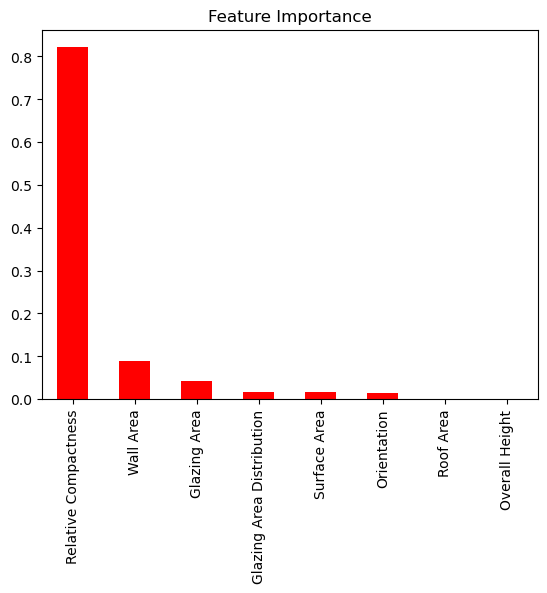

Cross-validation scores: [0.91039277 0.91898292 0.94511972 0.95708409 0.93105917]
Mean R-squared score: 0.932527733078764
Training Metrics:
MSE: 0.0
R-squared score: 1.0
Testing Metrics:
MSE: 4.516247637795276
R-squared score: 0.9495961365057795
               MSE  R-squared score
Training  0.000000         1.000000
Testing   4.516248         0.949596


In [12]:
dt = DecisionTreeRegressor()


dt.fit(X_train, y2_train)


y2_test_pred = dt.predict(X_test)
mse_test_c1 = mean_squared_error(y2_test, y2_test_pred)
r2_test_c1 = r2_score(y2_test, y2_test_pred)


y2_train_pred = dt.predict(X_train)
mse_train_c1 = mean_squared_error(y2_train, y2_train_pred)
r2_train_c1 = r2_score(y2_train, y2_train_pred)


compare_df = pd.DataFrame({'MSE': [mse_train_c1, mse_test_c1], 'R-squared score': [r2_train_c1, r2_test_c1]}, 
                          index=['Training', 'Testing'])


coef = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


scores = cross_val_score(dt, X_train, y2_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_c1)
print("R-squared score:", r2_train_c1)

print("Testing Metrics:")
print("MSE:", mse_test_c1)
print("R-squared score:", r2_test_c1)


print(compare_df)

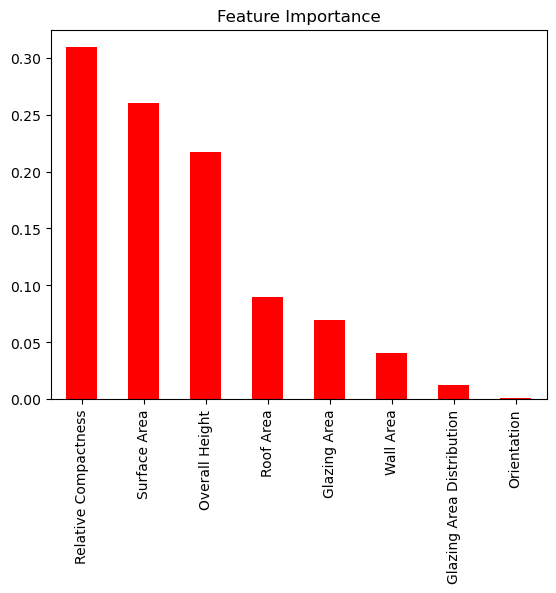

Cross-validation scores: [0.98893766 0.99757411 0.99769144 0.99731765 0.9960808 ]
Mean R-squared score: 0.9955203330479622
Training Metrics:
MSE: 0.052219701712062194
R-squared score: 0.9994825396221364
Testing Metrics:
MSE: 0.26361900633858054
R-squared score: 0.9974430741043803
               MSE  R-squared score
Training  0.052220         0.999483
Testing   0.263619         0.997443


In [13]:
rf = RandomForestRegressor()


rf.fit(X_train, y1_train)


y1_test_pred = rf.predict(X_test)
mse_test_h2 = mean_squared_error(y1_test, y1_test_pred)
r2_test_h2 = r2_score(y1_test, y1_test_pred)


y1_train_pred = rf.predict(X_train)
mse_train_h2 = mean_squared_error(y1_train, y1_train_pred)
r2_train_h2 = r2_score(y1_train, y1_train_pred)


compare_df = pd.DataFrame({'MSE': [mse_train_h2, mse_test_h2], 'R-squared score': [r2_train_h2, r2_test_h2]}, 
                          index=['Training', 'Testing'])


coef = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


scores = cross_val_score(rf, X_train, y1_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_h2)
print("R-squared score:", r2_train_h2)

print("Testing Metrics:")
print("MSE:", mse_test_h2)
print("R-squared score:", r2_test_h2)


print(compare_df)

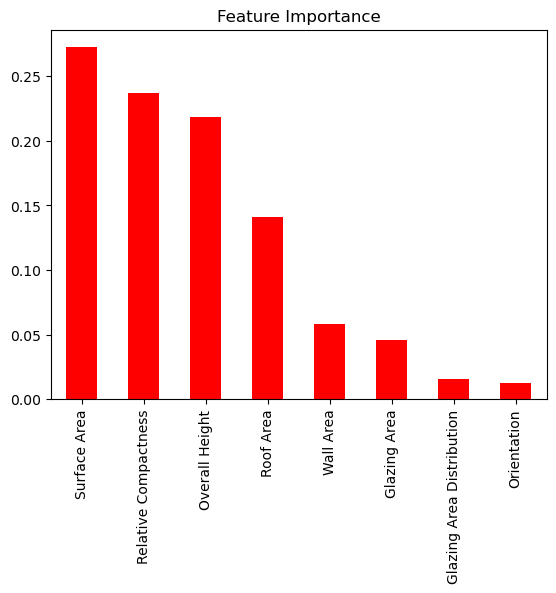

Cross-validation scores: [0.94323867 0.96333878 0.96792652 0.97255363 0.96411774]
Mean R-squared score: 0.9622350671050797
Training Metrics:
MSE: 0.39680478902723604
R-squared score: 0.9956253651908091
Testing Metrics:
MSE: 3.065346365472454
R-squared score: 0.9657890106656764
               MSE  R-squared score
Training  0.396805         0.995625
Testing   3.065346         0.965789


In [14]:

rf = RandomForestRegressor()


rf.fit(X_train, y2_train)


y2_test_pred = rf.predict(X_test)
mse_test_c2 = mean_squared_error(y2_test, y2_test_pred)
r2_test_c2 = r2_score(y2_test, y2_test_pred)


y2_train_pred = rf.predict(X_train)
mse_train_c2 = mean_squared_error(y2_train, y2_train_pred)
r2_train_c2 = r2_score(y2_train, y2_train_pred)


compare_df = pd.DataFrame({'MSE': [mse_train_c2, mse_test_c2], 'R-squared score': [r2_train_c2, r2_test_c2]}, 
                          index=['Training', 'Testing'])


coef = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


scores = cross_val_score(rf, X_train, y2_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_c2)
print("R-squared score:", r2_train_c2)

print("Testing Metrics:")
print("MSE:", mse_test_c2)
print("R-squared score:", r2_test_c2)


print(compare_df)

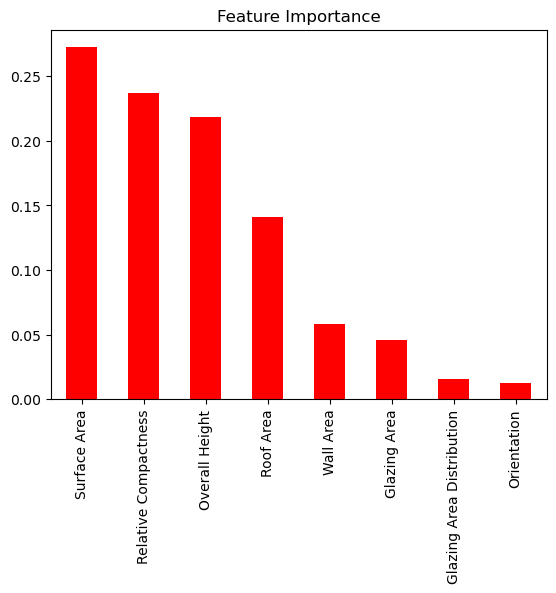

Training Metrics:
MSE: 8.817433523262707
R-squared score: 0.9126254587225974
Testing Metrics:
MSE: 9.388983496478224
R-squared score: 0.9089332162763013
               MSE  R-squared score
Training  8.817434         0.912625
Testing   9.388983         0.908933


In [15]:

lr = LinearRegression()


lr.fit(X_train, y1_train)


y1_test_pred = lr.predict(X_test)
mse_test_h3 = mean_squared_error(y1_test, y1_test_pred)
r2_test_h3 = r2_score(y1_test, y1_test_pred)


y1_train_pred = lr.predict(X_train)
mse_train_h3 = mean_squared_error(y1_train, y1_train_pred)
r2_train_h3 = r2_score(y1_train, y1_train_pred)


coef = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()



compare_df = pd.DataFrame({'MSE': [mse_train_h3, mse_test_h3], 'R-squared score': [r2_train_h3, r2_test_h3]}, 
                          index=['Training', 'Testing'])


print("Training Metrics:")
print("MSE:", mse_train_h3)
print("R-squared score:", r2_train_h3)

print("Testing Metrics:")
print("MSE:", mse_test_h3)
print("R-squared score:", r2_test_h3)


print(compare_df)

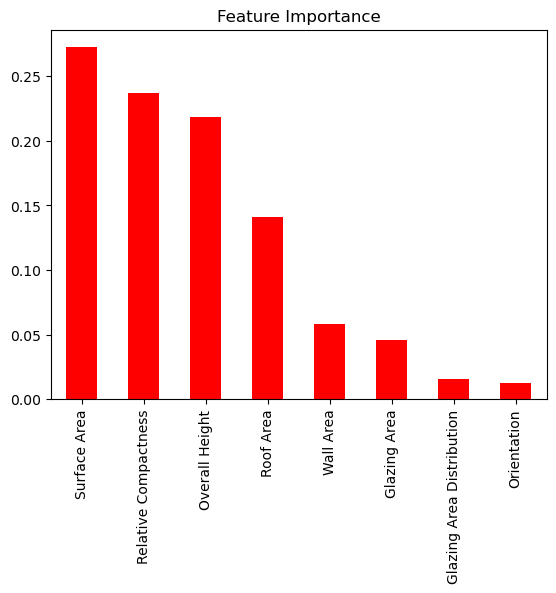

Training Metrics:
MSE: 11.219968153042924
R-squared score: 0.8763037528840263
Testing Metrics:
MSE: 10.7928457450326
R-squared score: 0.8795457717831499
                MSE  R-squared score
Training  11.219968         0.876304
Testing   10.792846         0.879546


In [16]:
lr = LinearRegression()


lr.fit(X_train, y2_train)


y2_test_pred = lr.predict(X_test)
mse_test_c3 = mean_squared_error(y2_test, y2_test_pred)
r2_test_c3 = r2_score(y2_test, y2_test_pred)


y2_train_pred = lr.predict(X_train)
mse_train_c3 = mean_squared_error(y2_train, y2_train_pred)
r2_train_c3 = r2_score(y2_train, y2_train_pred)


coef = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


compare_df = pd.DataFrame({'MSE': [mse_train_c3, mse_test_c3], 'R-squared score': [r2_train_c3, r2_test_c3]}, 
                          index=['Training', 'Testing'])


print("Training Metrics:")
print("MSE:", mse_train_c3)
print("R-squared score:", r2_train_c3)

print("Testing Metrics:")
print("MSE:", mse_test_c3)
print("R-squared score:", r2_test_c3)


print(compare_df)

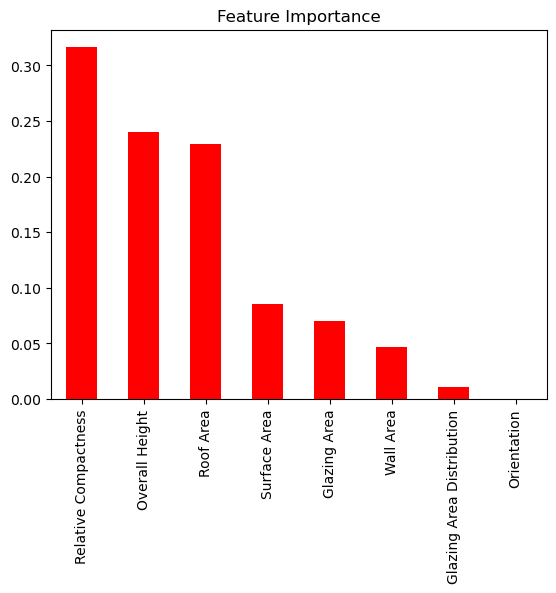

Cross-validation scores: [0.99264828 0.99757286 0.99806244 0.99762971 0.99650874]
Mean R-squared score: 0.9964844049312795
Training Metrics:
MSE: 0.18434897886865084
R-squared score: 0.9981732317662378
Testing Metrics:
MSE: 0.2431834327664226
R-squared score: 0.9976412853334726
               MSE  R-squared score
Training  0.184349         0.998173
Testing   0.243183         0.997641


In [17]:
gbr = GradientBoostingRegressor()


gbr.fit(X_train, y1_train)


y1_test_pred = gbr.predict(X_test)
mse_test_h4 = mean_squared_error(y1_test, y1_test_pred)
r2_test_h4 = r2_score(y1_test, y1_test_pred)


y1_train_pred = gbr.predict(X_train)
mse_train_h4 = mean_squared_error(y1_train, y1_train_pred)
r2_train_h4 = r2_score(y1_train, y1_train_pred)


compare_df = pd.DataFrame({'MSE': [mse_train_h4 , mse_test_h4 ], 'R-squared score': [r2_train_h4 , r2_test_h4 ]}, 
                          index=['Training', 'Testing'])


coef = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


scores = cross_val_score(gbr, X_train, y1_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_h4)
print("R-squared score:", r2_train_h4)

print("Testing Metrics:")
print("MSE:", mse_test_h4)
print("R-squared score:", r2_test_h4)


print(compare_df)

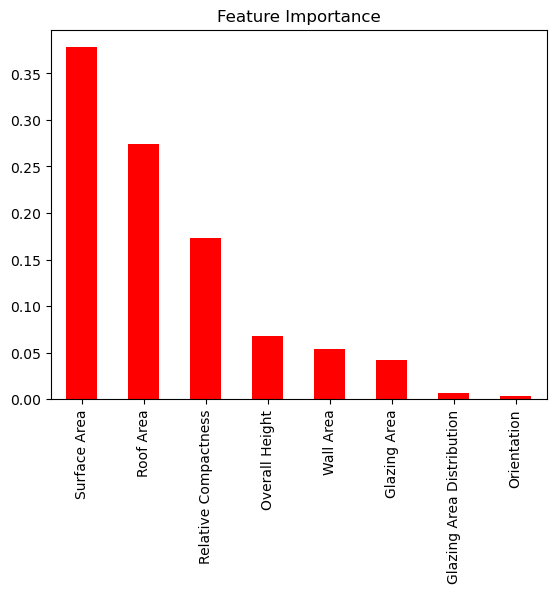

Cross-validation scores: [0.95795768 0.97522043 0.97026594 0.97651855 0.97591467]
Mean R-squared score: 0.9711754542519946
Training Metrics:
MSE: 1.8664982537101227
R-squared score: 0.9794225058321716
Testing Metrics:
MSE: 2.146460406722534
R-squared score: 0.9760442947302581
               MSE  R-squared score
Training  1.866498         0.979423
Testing   2.146460         0.976044


In [18]:

gbr = GradientBoostingRegressor()


gbr.fit(X_train, y2_train)


y2_test_pred = gbr.predict(X_test)
mse_test_c4 = mean_squared_error(y2_test, y2_test_pred)
r2_test_c4 = r2_score(y2_test, y2_test_pred)


y2_train_pred = gbr.predict(X_train)
mse_train_c4 = mean_squared_error(y2_train, y2_train_pred)
r2_train_c4 = r2_score(y2_train, y2_train_pred)


compare_df = pd.DataFrame({'MSE': [mse_train_c4, mse_test_c4], 'R-squared score': [r2_train_c4, r2_test_c4]}, 
                          index=['Training', 'Testing'])


coef = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()


scores = cross_val_score(gbr, X_train, y2_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_c4)
print("R-squared score:", r2_train_c4)

print("Testing Metrics:")
print("MSE:", mse_test_c4)
print("R-squared score:", r2_test_c4)


print(compare_df)

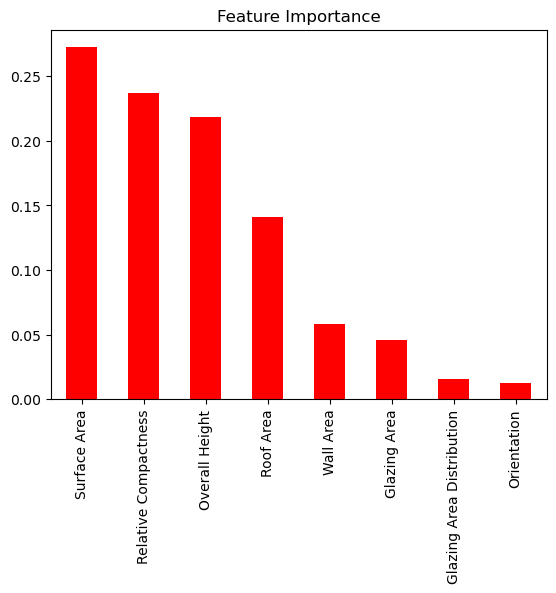

Cross-validation scores: [0.90889977 0.91267443 0.90542266 0.91930624 0.93613804]
Mean R-squared score: 0.9164882292930949
Training Metrics:
MSE: 5.432133805447471
R-squared score: 0.9461713889697898
Testing Metrics:
MSE: 9.906175590551182
R-squared score: 0.9039168030945959
               MSE  R-squared score
Training  5.432134         0.946171
Testing   9.906176         0.903917


In [19]:
knn = KNeighborsRegressor()


knn.fit(X_train, y1_train)


y1_test_pred = knn.predict(X_test)
mse_test_h5 = mean_squared_error(y1_test, y1_test_pred)
r2_test_h5 = r2_score(y1_test, y1_test_pred)


y1_train_pred = knn.predict(X_train)
mse_train_h5 = mean_squared_error(y1_train, y1_train_pred)
r2_train_h5 = r2_score(y1_train, y1_train_pred)


coef = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()



compare_df = pd.DataFrame({'MSE': [mse_train_h5, mse_test_h5], 'R-squared score': [r2_train_h5, r2_test_h5]}, 
                          index=['Training', 'Testing'])


scores = cross_val_score(knn, X_train, y1_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_h5)
print("R-squared score:", r2_train_h5)

print("Testing Metrics:")
print("MSE:", mse_test_h5)
print("R-squared score:", r2_test_h5)


print(compare_df)

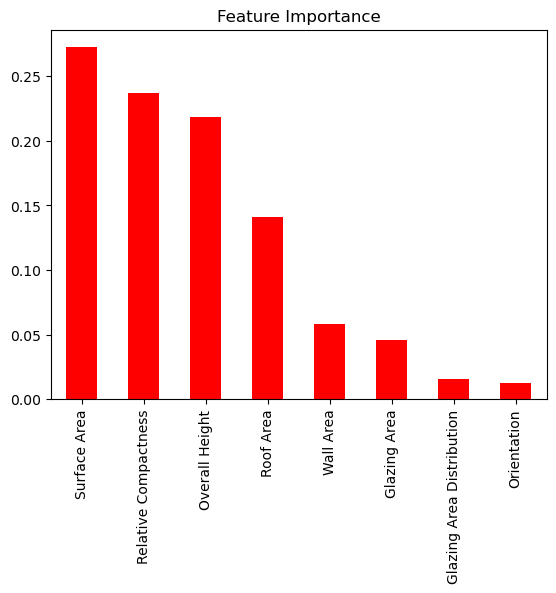

Cross-validation scores: [0.88940773 0.88282721 0.87503375 0.90415319 0.90375375]
Mean R-squared score: 0.8910351259439027
Training Metrics:
MSE: 6.603320466926069
R-squared score: 0.9272006881729578
Testing Metrics:
MSE: 9.911372094488188
R-squared score: 0.889383513448149
               MSE  R-squared score
Training  6.603320         0.927201
Testing   9.911372         0.889384


In [20]:
knn = KNeighborsRegressor()


knn.fit(X_train, y2_train)


y2_test_pred = knn.predict(X_test)
mse_test_c5 = mean_squared_error(y2_test, y2_test_pred)
r2_test_c5  = r2_score(y2_test, y2_test_pred)


y2_train_pred = knn.predict(X_train)
mse_train_c5  = mean_squared_error(y2_train, y2_train_pred)
r2_train_c5  = r2_score(y2_train, y2_train_pred)


coef = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance", color='red')
plt.show()



compare_df = pd.DataFrame({'MSE': [mse_train_c5, mse_test_c5], 'R-squared score': [r2_train_c5, r2_test_c5]}, 
                          index=['Training', 'Testing'])


scores = cross_val_score(knn, X_train, y2_train, scoring='r2', cv=5)
print("Cross-validation scores:", scores)
print("Mean R-squared score:", np.mean(scores))


print("Training Metrics:")
print("MSE:", mse_train_c5 )
print("R-squared score:", r2_train_c5 )

print("Testing Metrics:")
print("MSE:", mse_test_c5 )
print("R-squared score:", r2_test_c5 )


print(compare_df)

In [21]:
data_1 = {
    'model': ['DecisionTreeRegressor','RandomForestRegressor', 'LinearRegression','GradientBoostingRegressor',
              'KNeighborsRegressor'],
    'r2-train_Heating': [r2_train_h1,r2_train_h2,r2_train_h3,r2_train_h4,r2_train_h5],
    'r2-test_Heating': [r2_test_h1,r2_test_h2,r2_test_h3,r2_test_h4,r2_test_h5],
    'r2-train_Cooling': [r2_train_c1,r2_train_c2,r2_train_c3,r2_train_c4,r2_train_c5],
    'r2-test_Cooling': [r2_test_c1,r2_test_c2,r2_test_c3,r2_test_c4,r2_test_c5],
    
    
}
data_2={
    'model': ['DecisionTreeRegressor','RandomForestRegressor', 'LinearRegression','GradientBoostingRegressor',
              'KNeighborsRegressor'],
    'mse-train_Heating': [mse_train_h1,mse_train_h2,mse_train_h3,mse_train_h4,mse_train_h5],
    'mse-test_Heating': [mse_test_h1,mse_test_h2,mse_test_h3,mse_test_h4,mse_test_h5],
    'mse-train_Cooling': [mse_train_c1,mse_train_c2,mse_train_c3,mse_train_c4,mse_train_c5],
    'mse-test_Cooling': [mse_test_c1,mse_test_c2,mse_test_c3,mse_test_c4,mse_test_c5]
}

df = pd.DataFrame(data_1)
print(df.to_markdown(index=False))


df = pd.DataFrame(data_2)
print(df.to_markdown(index=False))

| model                     |   r2-train_Heating |   r2-test_Heating |   r2-train_Cooling |   r2-test_Cooling |
|:--------------------------|-------------------:|------------------:|-------------------:|------------------:|
| DecisionTreeRegressor     |           1        |          0.997218 |           1        |          0.949596 |
| RandomForestRegressor     |           0.999483 |          0.997443 |           0.995625 |          0.965789 |
| LinearRegression          |           0.912625 |          0.908933 |           0.876304 |          0.879546 |
| GradientBoostingRegressor |           0.998173 |          0.997641 |           0.979423 |          0.976044 |
| KNeighborsRegressor       |           0.946171 |          0.903917 |           0.927201 |          0.889384 |
| model                     |   mse-train_Heating |   mse-test_Heating |   mse-train_Cooling |   mse-test_Cooling |
|:--------------------------|--------------------:|-------------------:|--------------------:|------